# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## VI. Profils de production avec la librairie DataFrame

### Imports

In [1]:
#Bibliothèques de base
import numpy as np 
import pandas as pd
import csv
from datetime import datetime

#Affichages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go

#Statistiques
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [2]:
colors = ["palevioletred", "mediumaquamarine", "cornflowerblue", "royalblue", "slategray", 
          "mediumseagreen", "salmon", "yellow", "khaki", "0.2"]

In [3]:
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv", header=None)
vre2016 = pd.read_csv("inputs/vre_profiles2016.csv", header=None)
vre2015 = pd.read_csv("inputs/vre_profiles2015.csv", header=None)
vre2014 = pd.read_csv("inputs/vre_profiles2014.csv", header=None)
vre2013 = pd.read_csv("inputs/vre_profiles2013.csv", header=None)
vre2012 = pd.read_csv("inputs/vre_profiles2012.csv", header=None)
vre2011 = pd.read_csv("inputs/vre_profiles2011.csv", header=None)
vre2010 = pd.read_csv("inputs/vre_profiles2010.csv", header=None)
vre2009 = pd.read_csv("inputs/vre_profiles2009.csv", header=None)
vre2008 = pd.read_csv("inputs/vre_profiles2008.csv", header=None)
vre2007 = pd.read_csv("inputs/vre_profiles2007.csv", header=None)
vre2006 = pd.read_csv("inputs/vre_profiles2006.csv", header=None)
vre2005 = pd.read_csv("inputs/vre_profiles2005.csv", header=None)
vre2004 = pd.read_csv("inputs/vre_profiles2004.csv", header=None)
vre2003 = pd.read_csv("inputs/vre_profiles2003.csv", header=None)
vre2002 = pd.read_csv("inputs/vre_profiles2002.csv", header=None)
vre2001 = pd.read_csv("inputs/vre_profiles2001.csv", header=None)
vre2000 = pd.read_csv("inputs/vre_profiles2000.csv", header=None)

### 1. Utils

#### 1.1 Création DataFrame avec plusieurs vre

In [4]:
def Formater(profil, time):
    
    #on découpe le profil entre les différentes technologies génératrices
    profil.columns = ["vre", "heure", "prod"]
    profil_offshore = profil.head(8760)
    profil_onshore = profil.truncate(before = 8760, after = 17519)
    profil_pv = profil.tail(8760)
    
    profil_offshore.columns = ["vre", "heure", "prod"]
    profil_offshore['heure'] = pd.to_datetime(profil_offshore['heure'], unit='h', origin=pd.Timestamp(time))
    profil_offshore = profil_offshore.set_index('heure')
    
    profil_onshore.columns = ["vre", "heure", "prod"]
    profil_onshore['heure'] = pd.to_datetime(profil_onshore['heure'], unit='h', origin=pd.Timestamp(time))
    profil_onshore = profil_onshore.set_index('heure')
    
    profil_pv.columns = ["vre", "heure", "prod"]
    profil_pv['heure'] = pd.to_datetime(profil_pv['heure'], unit='h', origin=pd.Timestamp(time))
    profil_pv = profil_pv.set_index('heure')
    
    profils = pd.DataFrame(profil_offshore["prod"])
    profils.columns = ['offshore']
    profils.insert(1, "onshore", profil_onshore['prod'])
    profils.insert(2, "pv", profil_pv['prod'])

    return profils

### 2. Profils sur l'année 2006

In [5]:
import warnings
warnings.filterwarnings('ignore')
#Profil de production des vre avec indexation sur les dates 
profil_2006 = Formater(vre2006, '2006-01-01')
profil_2006.head()

,offshore,onshore,pv
heure,,,
2006-01-01 00:00:00,0.865143,0.511702,0.0
2006-01-01 01:00:00,0.880000,0.527910,0.0
2006-01-01 02:00:00,0.880000,0.537973,0.0
2006-01-01 03:00:00,0.873429,0.541571,0.0
2006-01-01 04:00:00,0.852000,0.538737,0.0


#### 2.1 Offshore

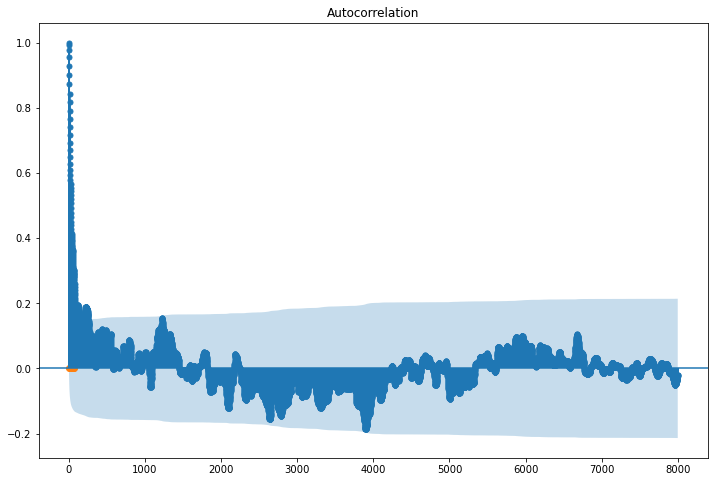

In [6]:
#autocorrelation
sm.tsa.acf(profil_2006["offshore"])
plt.rc("figure", figsize=(12,8))
tsaplots.plot_acf(profil_2006["offshore"], lags=8000)
x = [i*24 for i in range(365)]
y = np.zeros(365)
plt.scatter(x=x[:4], y=y[:4])
plt.show()

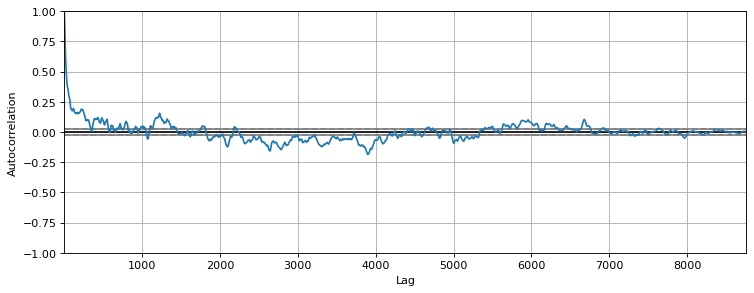

In [7]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(profil_2006.loc['2006-01': '2006-12', 'offshore'])
#plt.scatter(x=x[:100], y=y[:100], c='r')
plt.show()

#### 2.2 Onshore

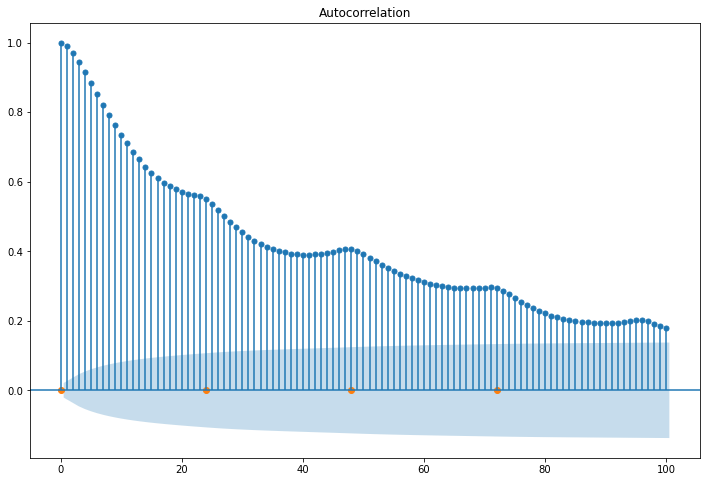

In [8]:
#autocorrelation
sm.tsa.acf(profil_2006["onshore"])
plt.rc("figure", figsize=(12,8))
tsaplots.plot_acf(profil_2006["onshore"], lags=100) #taille de l'échantillon
x = [i*24 for i in range(365)]
y = np.zeros(365)
plt.scatter(x=x[:4], y=y[:4])
plt.show()

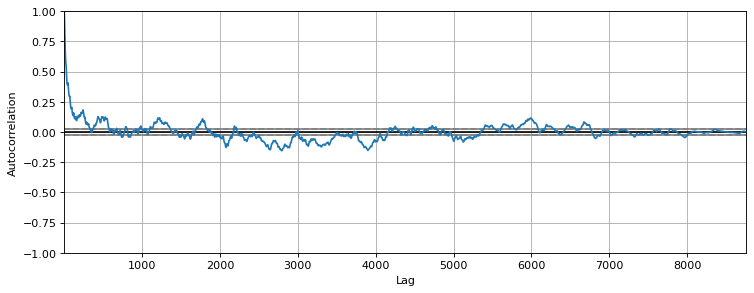

In [9]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(profil_2006.loc['2006-01': '2006-12', 'onshore'])
#plt.scatter(x=x[:100], y=y[:100], c='r')
plt.show()

#### 2.3 Solaire

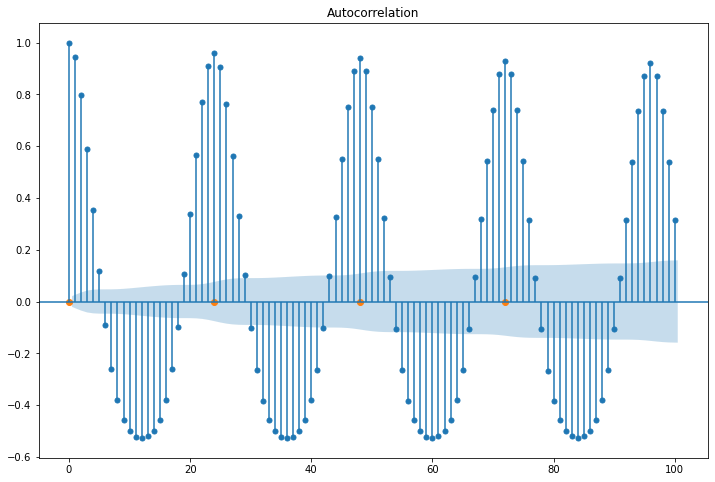

In [10]:
#autocorrelation
sm.tsa.acf(profil_2006["pv"])
plt.rc("figure", figsize=(12,8))
tsaplots.plot_acf(profil_2006["pv"], lags=100)
x = [i*24 for i in range(365)]
y = np.zeros(365)
plt.scatter(x=x[:4], y=y[:4])
plt.show()

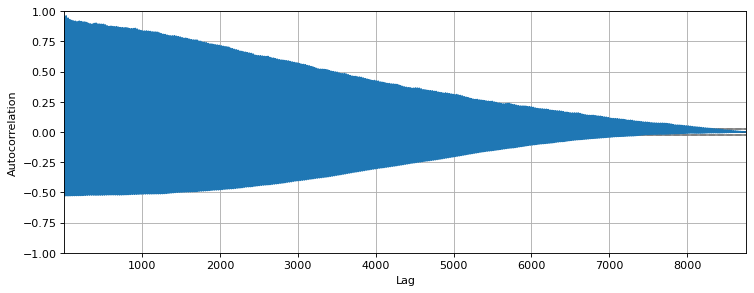

In [11]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(profil_2006.loc['2006-01': '2006-12', 'pv'])
#plt.scatter(x=x[:100], y=y[:100], c='r')
plt.show()

### 5. Décompostion des courbes de production des vre

#### 5.1 Profil offshore

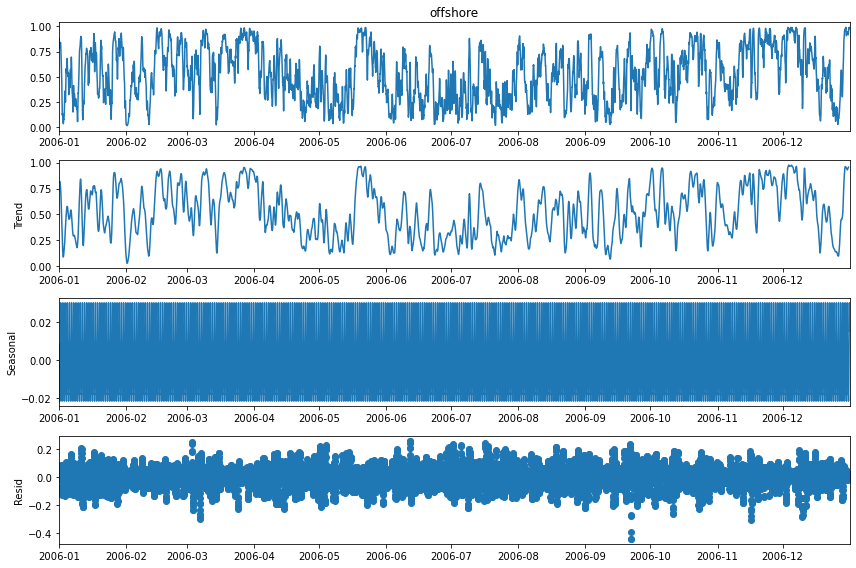

In [12]:
decomp_off = sm.tsa.seasonal_decompose(profil_2006['offshore'], model = 'aditive')
decomp_off.plot()
plt.show()

In [24]:
d_off_s = pd.DataFrame(decomp_off.seasonal)
d_off_o = pd.DataFrame(decomp_off.observed, columns=["heure", "offshore"])
d_off_o = d_off_o.ffill()
d_off_t = pd.DataFrame(decomp_off.trend)
d_off_t = d_off_t.ffill()
d_off_r = pd.DataFrame(decomp_off.resid)
d_off_r = d_off_r.ffill()

fig = go.Figure()
fig.add_trace(go.Line(y=d_off_s["seasonal"], name='Saisonnalité'))
fig.add_trace(go.Line(y=d_off_t["trend"], name='Tendance'))
#fig.add_trace(go.Line(y=d_off_r["resid"], name='Residuel'))
#fig.add_trace(go.Line(y=d_off_o["offshore"], name='Brut'))
fig.update_layout(title='Décomposition du profil offshore',
                          yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

#### 5.2 Profils onshore

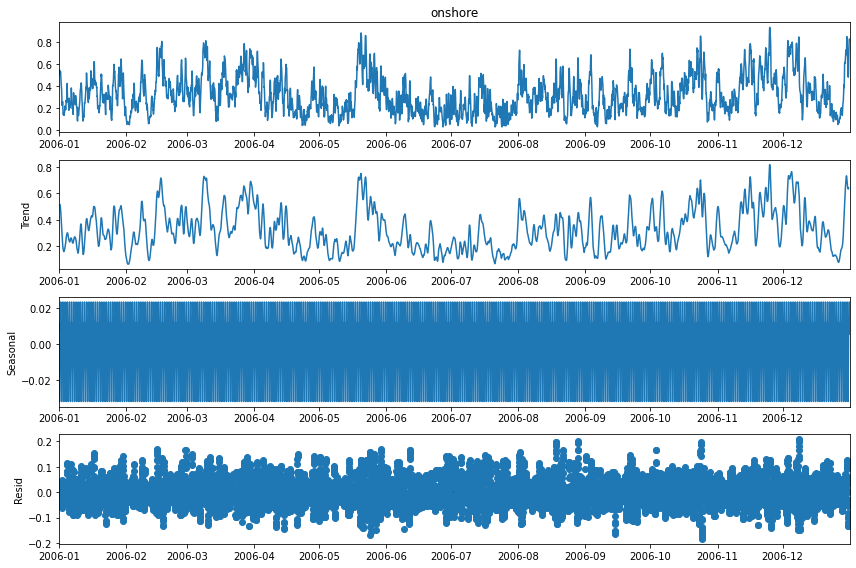

In [13]:
decomp_on = sm.tsa.seasonal_decompose(profil_2006['onshore'], model = 'aditive')
decomp_on.plot()
plt.show()

In [18]:
d_on_s = pd.DataFrame(decomp_on.seasonal)
d_on_o = pd.DataFrame(decomp_on.observed, columns=["heure", "onshore"])
d_on_o = d_on_o.ffill()
d_on_t = pd.DataFrame(decomp_on.trend)
d_on_t = d_on_t.ffill()
d_on_r = pd.DataFrame(decomp_on.resid)
d_on_r = d_on_r.ffill()

fig = go.Figure()
fig.add_trace(go.Line(y=d_on_s["seasonal"], name='Saisonnalité'))
fig.add_trace(go.Line(y=d_on_t["trend"], name='Tendance'))
#fig.add_trace(go.Line(y=d_on_r["resid"], name='Residuel'))
#fig.add_trace(go.Line(y=d_on_o["onshore"], name='Brut'))
fig.update_layout(title='Décomposition du profil onshore',
                          yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

#### 5.3 Profils pv

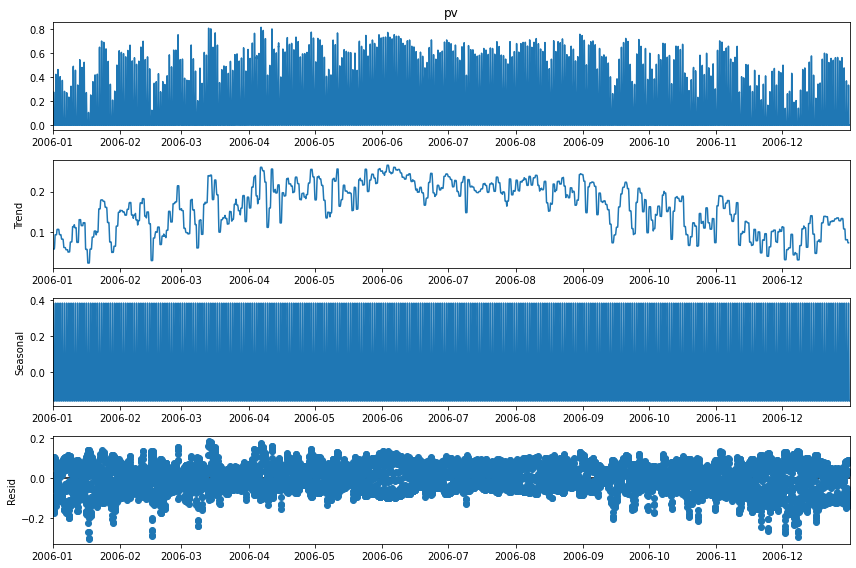

In [19]:
decomp_pv = sm.tsa.seasonal_decompose(profil_2006['pv'], model = 'aditive')
decomp_pv.plot()
plt.show()

In [20]:
d_pv_s = pd.DataFrame(decomp_pv.seasonal)
d_pv_o = pd.DataFrame(decomp_pv.observed)
d_pv_o = d_pv_o.ffill()
d_pv_t = pd.DataFrame(decomp_pv.trend)
d_pv_t = d_pv_t.ffill()
d_pv_r = pd.DataFrame(decomp_pv.resid)
d_pv_r = d_pv_r.ffill()

fig = go.Figure()
fig.add_trace(go.Line(y=d_pv_s["seasonal"], name='Saisonnalité'))
fig.add_trace(go.Line(y=d_pv_t["trend"], name='Tendance'))
#fig.add_trace(go.Line(y=d_pv_r["resid"], name='Residuel'))
#fig.add_trace(go.Line(y=d_pv_o["pv"], name='Brut'))
fig.update_layout(title='Décomposition du profil solaire',
                          yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()